In [7]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, ExpSineSquared
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
np.random.seed(1)

In [8]:
def f(x):
    """The function to predict."""
    return 10 * np.sin( x) + x

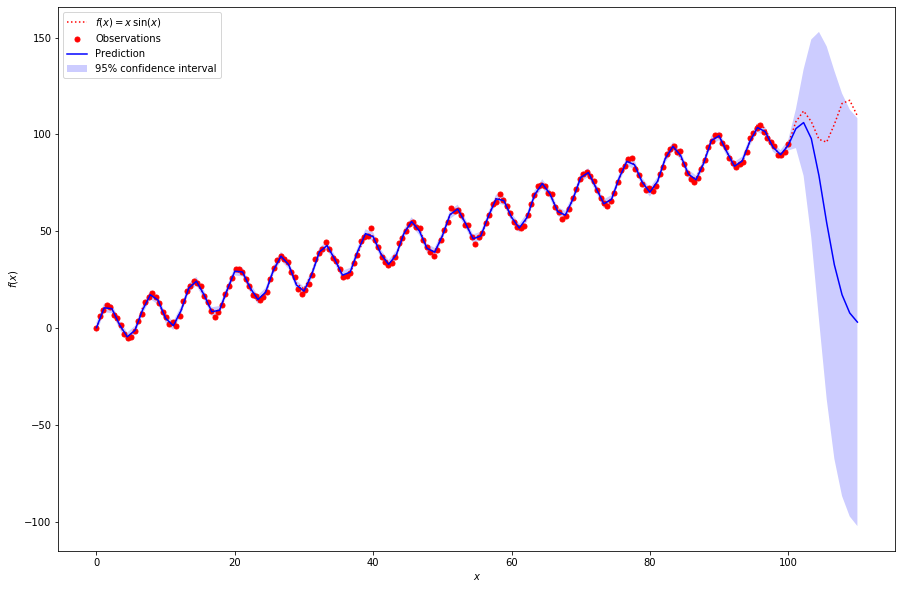

In [9]:
# ----------------------------------------------------------------------
#  First the noiseless case
start = 0
end = 100

X = np.linspace(start,end, 200).reshape((-1,1))

# Observations
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(start, end + 10, 100)).T

# Instantiate a Gaussian Process model
kernel = ConstantKernel(1) + 2 * RBF(1) + ExpSineSquared(length_scale=1.0, periodicity = (2 * np.pi), periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(15,10))
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')